In [8]:
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
from minisom import MiniSom
import matplotlib.pyplot as plt
import random


In [9]:

# 1. Load QM9 dataset
tasks, datasets, _ = dc.molnet.load_qm9(featurizer='GraphConv')
train_dataset, _, _ = datasets
N = 50000  # Number of molecules to use

# Extract SMILES and HOMO values (index 2)
smiles_list = []
homo_values = []
for i, (_, y, _, ids) in enumerate(train_dataset.iterbatches(batch_size=1, deterministic=True)):
    if i >= N:
        break
    smiles_list.append(ids[0])
    homo_values.append(y[0][2])  # HOMO is at index 2

homo_values = np.array(homo_values)


In [10]:
# 2. Generate Morgan Fingerprints (2048-bit)
def smiles_to_fingerprint(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)

print("\nGenerating Morgan fingerprints...")
X_fp = np.array([smiles_to_fingerprint(s) for s in tqdm(smiles_list)]).astype(float)

# 3. Normalize features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X_fp)
y_scaled = scaler_y.fit_transform(homo_values.reshape(-1, 1)).flatten()

# 4. SOM Feature Extraction
print("\nTraining SOM for feature extraction...")
som = MiniSom(4, 4, X_scaled.shape[1], sigma=0.7, learning_rate=0.3)
som.train_batch(X_scaled, 1000)  # Train SOM

def get_som_activation(x):
    return som.activation_response([x])[0].flatten()

# Create combined features (fingerprints + SOM activations)
X_som = np.array([get_som_activation(x) for x in tqdm(X_scaled)])
X_combined = np.concatenate([X_scaled, X_som], axis=1)



Generating Morgan fingerprints...


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s][17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenera

  1%|▊                                                                           | 503/50000 [00:00<00:09, 4991.66it/s][17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenera

  2%|█▊                                                                         | 1170/50000 [00:00<00:08, 5946.17it/s][17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenera

  4%|██▋                                                                        | 1796/50000 [00:00<00:07, 6070.32it/s][17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenera

[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerat

[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerat

  7%|█████▍                                                                     | 3666/50000 [00:00<00:07, 6182.78it/s][17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenerator
[17:36:26] DEPRECATION WARNING: please use MorganGenera

[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
  9%|██████▍                                                                    | 4300/50000 [00:00<00:07, 6222.73it/s][17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenera

 10%|███████▍                                                                   | 4960/50000 [00:00<00:07, 6336.60it/s][17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenera

 11%|████████▍                                                                  | 5622/50000 [00:00<00:06, 6420.14it/s][17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenera

[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerat

[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerat

 14%|██████████▎                                                                | 6912/50000 [00:01<00:06, 6276.62it/s][17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenera

[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerat

[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerat

[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerat

 16%|████████████▏                                                              | 8146/50000 [00:01<00:07, 5936.35it/s][17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenera

 18%|█████████████▏                                                             | 8759/50000 [00:01<00:06, 5980.12it/s][17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenera

[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerat

 19%|██████████████                                                             | 9359/50000 [00:01<00:06, 5955.94it/s][17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenerator
[17:36:27] DEPRECATION WARNING: please use MorganGenera

 20%|██████████████▉                                                            | 9977/50000 [00:01<00:06, 6005.26it/s][17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenera

[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerat

[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerat

[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerat

 22%|████████████████▌                                                         | 11225/50000 [00:01<00:06, 6088.52it/s][17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenera

[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerat

 24%|█████████████████▌                                                        | 11843/50000 [00:01<00:06, 6106.52it/s][17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenera

 25%|██████████████████▍                                                       | 12455/50000 [00:02<00:06, 6008.90it/s][17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenera

[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerat

 26%|███████████████████▎                                                      | 13057/50000 [00:02<00:06, 5984.54it/s][17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenerator
[17:36:28] DEPRECATION WARNING: please use MorganGenera

[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerat

 29%|█████████████████████▏                                                    | 14295/50000 [00:03<00:19, 1878.27it/s][17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenera

 30%|██████████████████████                                                    | 14947/50000 [00:03<00:14, 2411.40it/s][17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenerator
[17:36:29] DEPRECATION WARNING: please use MorganGenera

 31%|██████████████████████▉                                                   | 15491/50000 [00:03<00:12, 2837.30it/s][17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenera

 32%|███████████████████████▊                                                  | 16089/50000 [00:03<00:10, 3363.00it/s][17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenera

 33%|████████████████████████▊                                                 | 16732/50000 [00:03<00:08, 3954.48it/s][17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenera

 35%|█████████████████████████▋                                                | 17391/50000 [00:03<00:07, 4517.11it/s][17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenera

 36%|██████████████████████████▋                                               | 18057/50000 [00:04<00:06, 5011.17it/s][17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenera

 37%|███████████████████████████▋                                              | 18678/50000 [00:04<00:06, 5123.79it/s][17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenera

[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerat

 40%|█████████████████████████████▍                                            | 19866/50000 [00:04<00:05, 5437.17it/s][17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenera

 41%|██████████████████████████████▍                                           | 20545/50000 [00:04<00:05, 5797.01it/s][17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenera

 42%|███████████████████████████████▎                                          | 21159/50000 [00:04<00:05, 5606.69it/s][17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenerator
[17:36:30] DEPRECATION WARNING: please use MorganGenera

[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerat

 45%|█████████████████████████████████                                         | 22325/50000 [00:04<00:04, 5651.85it/s][17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenera

[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerat

 46%|██████████████████████████████████                                        | 22976/50000 [00:04<00:04, 5884.32it/s][17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenera

[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerat

 47%|██████████████████████████████████▉                                       | 23630/50000 [00:04<00:04, 6074.19it/s][17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenera

[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerat

 49%|███████████████████████████████████▉                                      | 24297/50000 [00:05<00:04, 6238.82it/s][17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenera

[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerat

[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerat

[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerat

 51%|█████████████████████████████████████▉                                    | 25614/50000 [00:05<00:03, 6146.99it/s][17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenera

 53%|██████████████████████████████████████▉                                   | 26285/50000 [00:05<00:03, 6297.05it/s][17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenera

[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerat

 54%|███████████████████████████████████████▊                                  | 26919/50000 [00:05<00:03, 6286.39it/s][17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenera

[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerat

 55%|████████████████████████████████████████▊                                 | 27551/50000 [00:05<00:03, 6028.03it/s][17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:31] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenera

[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerat

[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerat

 58%|██████████████████████████████████████████▌                               | 28762/50000 [00:05<00:03, 5709.71it/s][17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenera

[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
 59%|███████████████████████████████████████████▌                              | 29425/50000 [00:05<00:03, 5950.69it/s][17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenera

 60%|████████████████████████████████████████████▌                             | 30084/50000 [00:06<00:03, 6129.38it/s][17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenera

 61%|█████████████████████████████████████████████▌                            | 30745/50000 [00:06<00:03, 6259.93it/s][17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenera

[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerat

 63%|██████████████████████████████████████████████▍                           | 31375/50000 [00:06<00:03, 5802.19it/s][17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenera

 64%|███████████████████████████████████████████████▎                          | 31964/50000 [00:06<00:03, 5678.85it/s][17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenera

 65%|████████████████████████████████████████████████▏                         | 32538/50000 [00:06<00:03, 5472.99it/s][17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenera

 66%|█████████████████████████████████████████████████                         | 33160/50000 [00:06<00:02, 5665.84it/s][17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenerator
[17:36:32] DEPRECATION WARNING: please use MorganGenera

[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerat

[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerat

 69%|██████████████████████████████████████████████████▊                       | 34373/50000 [00:06<00:02, 5851.48it/s][17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenera

[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerat

 71%|████████████████████████████████████████████████████▋                     | 35606/50000 [00:07<00:02, 5774.22it/s][17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenera

[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerat

 74%|██████████████████████████████████████████████████████▋                   | 36939/50000 [00:07<00:02, 6201.05it/s][17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenera

[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerat

 75%|███████████████████████████████████████████████████████▌                  | 37564/50000 [00:07<00:02, 6213.14it/s][17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenera

 76%|████████████████████████████████████████████████████████▌                 | 38230/50000 [00:07<00:01, 6344.89it/s][17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenera

[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerat

[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerat

[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerat

 79%|██████████████████████████████████████████████████████████▌               | 39547/50000 [00:07<00:01, 6460.31it/s][17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:33] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenera

 80%|███████████████████████████████████████████████████████████▍              | 40195/50000 [00:07<00:01, 6128.46it/s][17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenera

 82%|████████████████████████████████████████████████████████████▍             | 40849/50000 [00:07<00:01, 6228.39it/s][17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenera

[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerat

 83%|█████████████████████████████████████████████████████████████▍            | 41487/50000 [00:07<00:01, 6264.36it/s][17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenera

 84%|██████████████████████████████████████████████████████████████▎           | 42123/50000 [00:08<00:01, 6285.66it/s][17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenera

 86%|███████████████████████████████████████████████████████████████▎          | 42760/50000 [00:08<00:01, 6309.68it/s][17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenera

[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerat

 88%|█████████████████████████████████████████████████████████████████▏        | 44056/50000 [00:08<00:00, 6354.85it/s][17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenera

[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerat

 89%|██████████████████████████████████████████████████████████████████▏       | 44693/50000 [00:08<00:00, 5894.46it/s][17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenera

 91%|███████████████████████████████████████████████████████████████████       | 45304/50000 [00:08<00:00, 5941.32it/s][17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenerator
[17:36:34] DEPRECATION WARNING: please use MorganGenera

 92%|███████████████████████████████████████████████████████████████████▉      | 45935/50000 [00:08<00:00, 6030.93it/s][17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenera

 93%|████████████████████████████████████████████████████████████████████▉     | 46552/50000 [00:08<00:00, 6053.25it/s][17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenera

 94%|█████████████████████████████████████████████████████████████████████▉    | 47231/50000 [00:08<00:00, 6266.69it/s][17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenera

 96%|██████████████████████████████████████████████████████████████████████▊   | 47875/50000 [00:08<00:00, 6302.30it/s][17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenera

 97%|███████████████████████████████████████████████████████████████████████▊  | 48552/50000 [00:09<00:00, 6432.84it/s][17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenera

 98%|████████████████████████████████████████████████████████████████████████▊ | 49213/50000 [00:09<00:00, 6477.62it/s][17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenera

100%|█████████████████████████████████████████████████████████████████████████▊| 49906/50000 [00:09<00:00, 6605.02it/s][17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenerator
[17:36:35] DEPRECATION WARNING: please use MorganGenera


Training SOM for feature extraction...


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:05<00:00, 8646.56it/s]


In [11]:
# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_scaled, test_size=0.2, random_state=42
)


In [12]:
# 6. Neural Network Model
class MolecularPropertyPredictor(nn.Module):
    def __init__(self, input_dim):
        super(MolecularPropertyPredictor, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.network(x).view(-1)

# Initialize model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MolecularPropertyPredictor(X_train.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)


In [17]:
# 8. Evaluation
model.eval()
with torch.no_grad():
    y_pred_scaled = model(X_test_tensor).cpu().numpy()
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Select random 100 samples for visualization
random_indices = random.sample(range(len(y_true)), 100)
actual = y_true[random_indices]
predicted = y_pred[random_indices]

# Calculate metrics
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))  # Manual RMSE calculation
r2 = r2_score(actual, predicted)

print("\nModel Performance on Random 100 Samples:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Performance on Random 100 Samples:
MAE: 0.6803
RMSE: 0.9135
R² Score: -0.0286


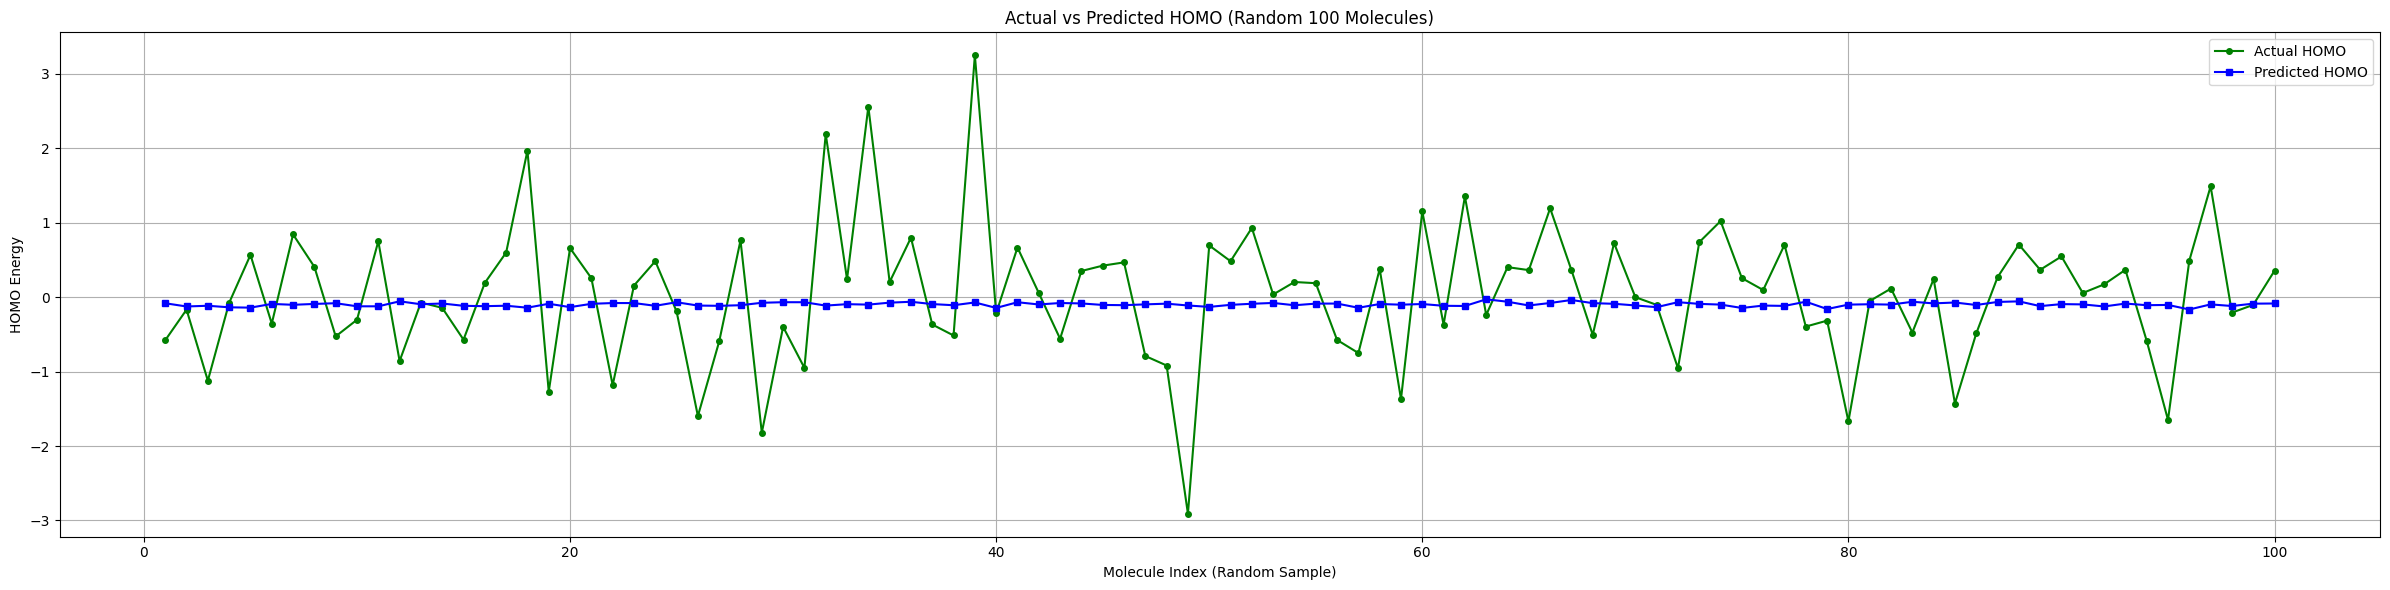

In [18]:


plt.figure(figsize=(24, 6))
plt.plot(range(1, 101), actual, label='Actual HOMO', marker='o', color='green', markersize=4)
plt.plot(range(1, 101), predicted, label='Predicted HOMO', marker='s', color='blue', markersize=4)
plt.xlabel("Molecule Index (Random Sample)")
plt.ylabel("HOMO Energy")
plt.title("Actual vs Predicted HOMO (Random 100 Molecules)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()